In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import os

In [2]:
#read data
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
print(pd.isnull(data).sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


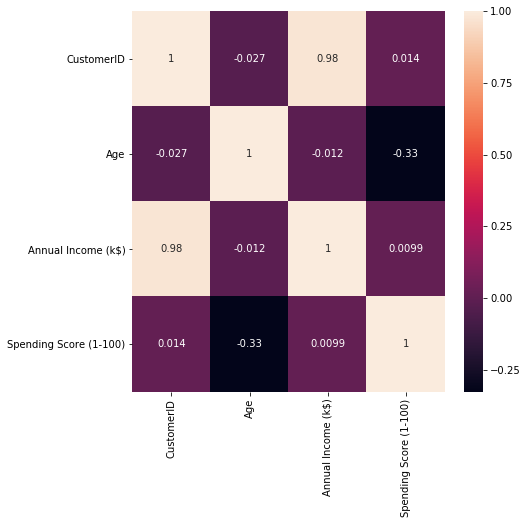

In [7]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

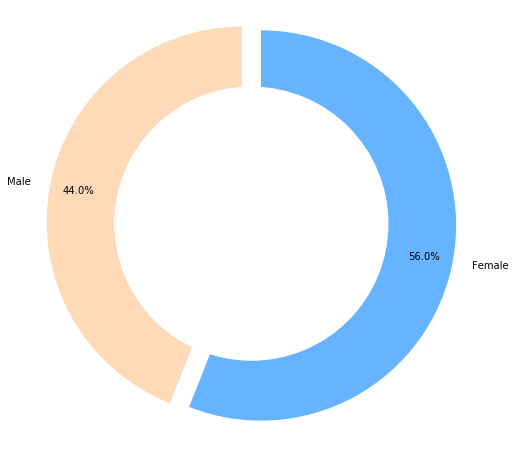

In [8]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

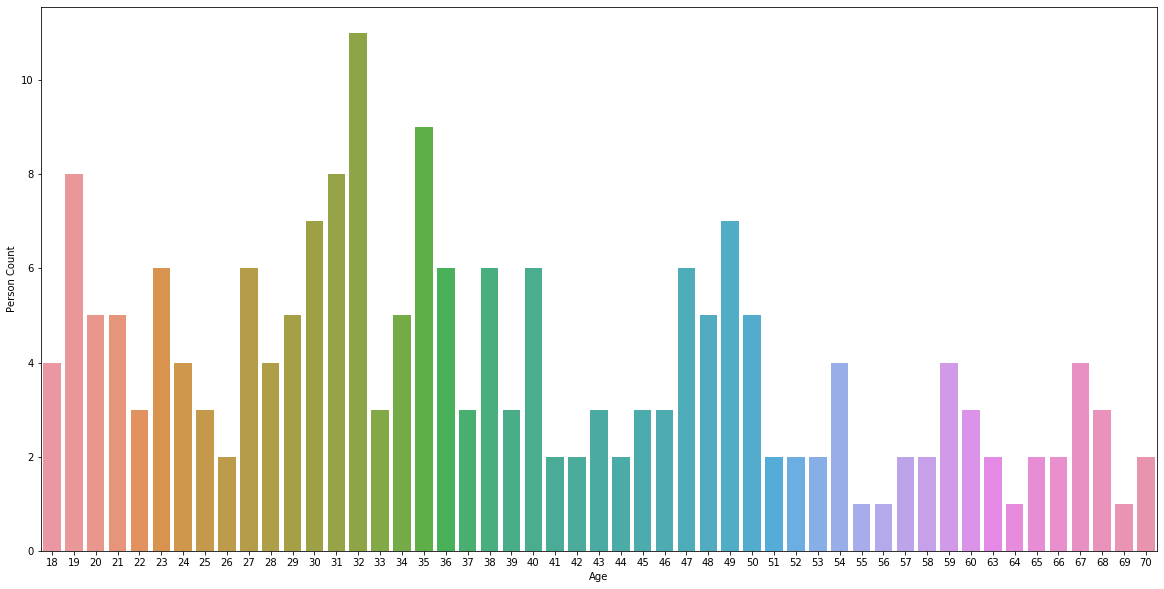

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

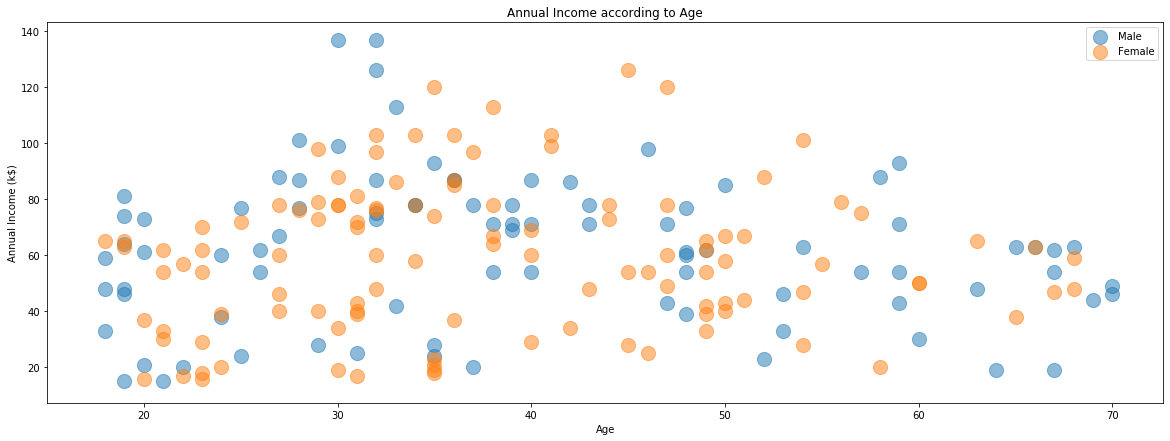

In [10]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Annual Income (k$)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Annual Income according to Age")
plt.show()

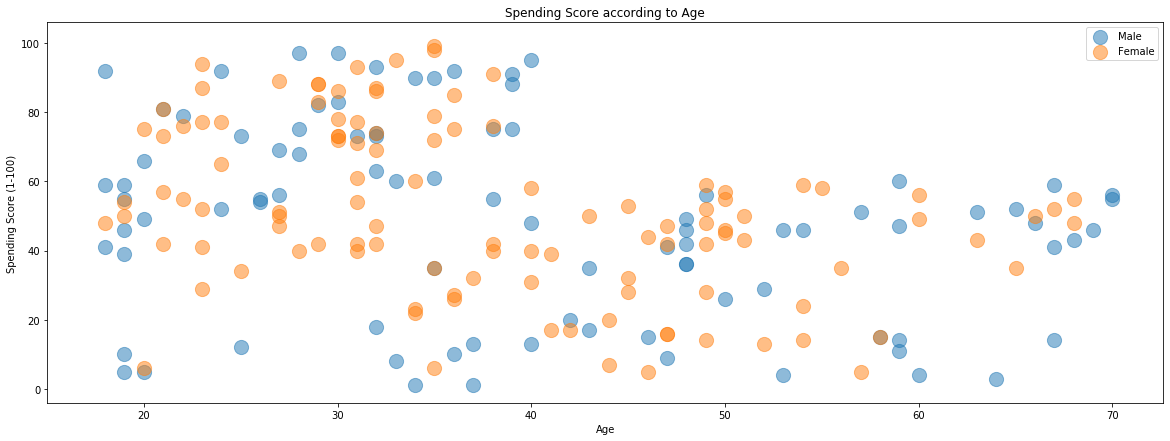

In [11]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Age")
plt.show()

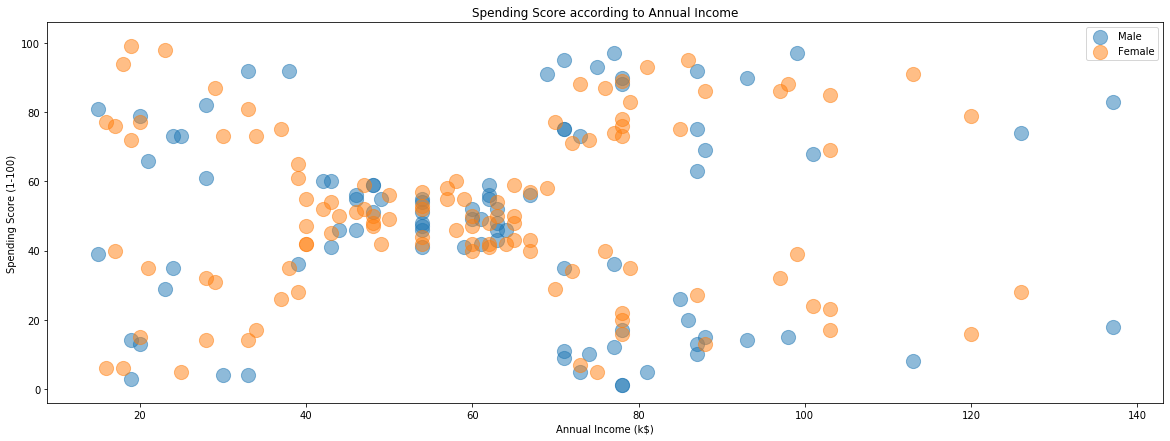

In [12]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Annual Income")
plt.show()

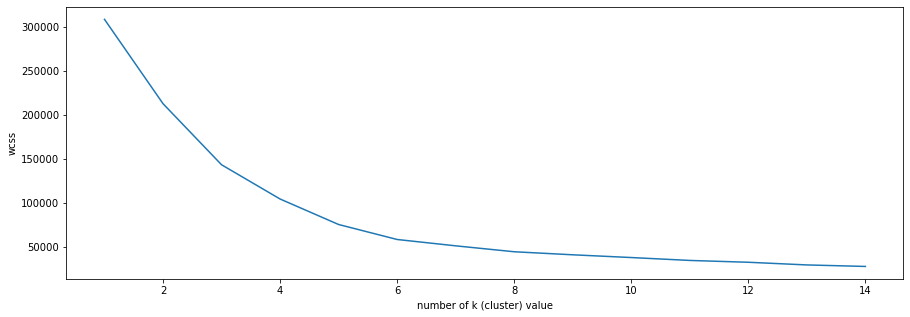

In [13]:
#define k value
wcss = []
data_model = data.drop(['Gender','CustomerID'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

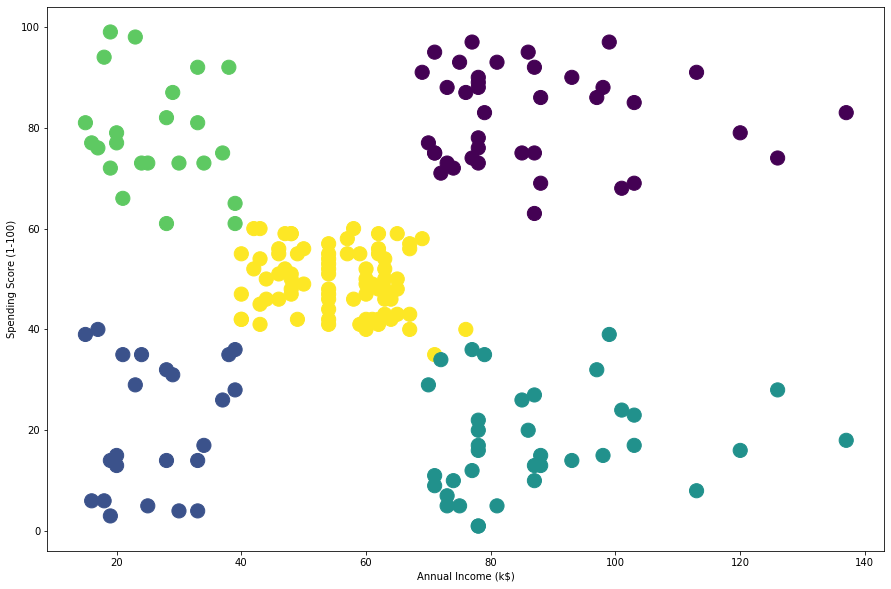

In [14]:
#create model
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

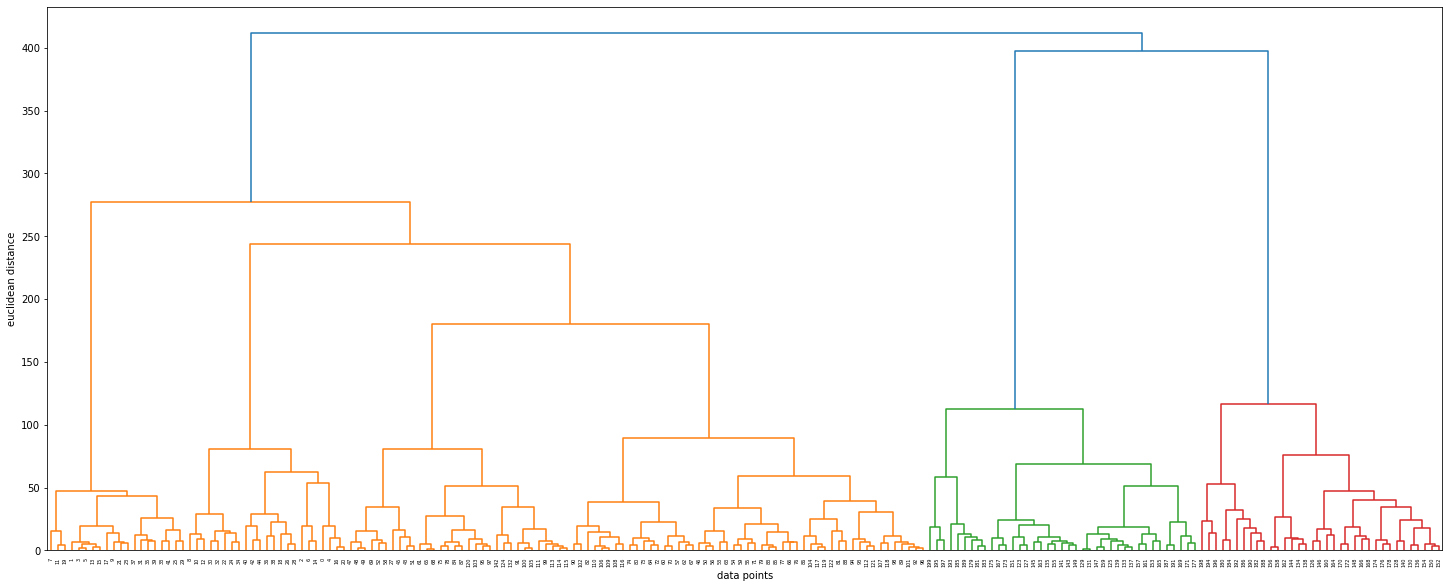

In [15]:
#create demogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

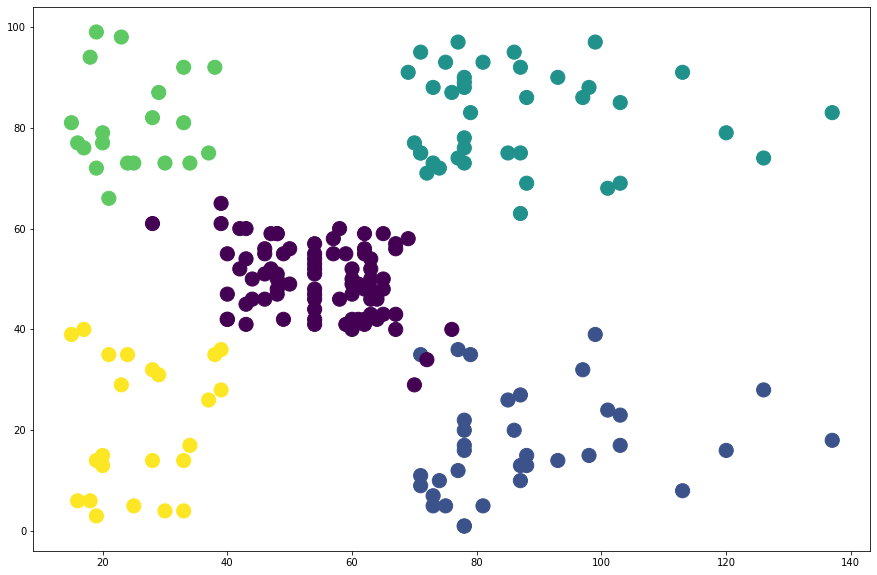

In [16]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , c = data_predict , s = 200 )
plt.show()